In [1]:
#Check which libraries are still needed
%run model.py
import os
from sklearn.ensemble import GradientBoostingClassifier
%matplotlib inline

In [2]:
#Load data
cwd = os.getcwd()
datadir = cwd + os.sep + 'data' + os.sep

def loadSentimentData(fileName):
    data = pd.read_csv(datadir + fileName, header=0, index_col=0)
    data.dropna(inplace=True)
    data.drop(['arousal_mv','valence_mv','label'], 1, inplace=True)
    data.index = data.index.astype('int64')
    
    return data

def loadUserData(fileName):
    data = pd.read_csv(datadir + fileName, header=0, encoding="cp1252")
    data = data[['id','favourites_count','followers_count','friends_count','listed_count','statuses_count', 'label', 'default_profile', 'default_profile_image','verified']]
    data.set_index('id', inplace=True)
    
    return data

def loadTimingData(fileName):
    data = pd.read_csv(datadir + fileName, header=0)
    data.set_index('user_id', inplace=True)
    
    return data

def loadData(fileNames):
    sentiment = loadSentimentData(fileNames[0])
    account = loadUserData(fileNames[1])
    timing = loadTimingData(fileNames[2])
    data = account.join(sentiment, how='left')
    data = data.join(timing, how='left')
    
    mv_cols = (pd.isnull(data)).any()
    for each_col, each_bool in zip(mv_cols.index.values, mv_cols):
        data[each_col+'_mv'] = np.where(np.isnan(data[each_col]), 1, 0)
        col_mean = data[each_col].mean()
        data[each_col] = data[each_col].fillna(col_mean)
        
    return data
    
data = loadData(['sentiment_dist_varol_dump.csv','varol-2017-users.csv','timing.csv'])

In [3]:
#Train test split
X_train_c, X_test_c, y_train, y_test = ms.train_test_split(data.drop("label", axis = 1), data.label, test_size=0.2, random_state=1001)
X_train, X_test = X_train_c.copy(), X_test_c.copy()

not_scalable= ['default_profile', 'default_profile_image', 'verified']

#Scale
scaler = pre.StandardScaler()
scaler.fit(X_train_c.copy())
X_train.loc[:,X_train.columns.difference(not_scalable)] = scaler.fit_transform(X_train.loc[:,X_train.columns.difference(not_scalable)])
X_test.loc[:,X_test.columns.difference(not_scalable)] = scaler.fit_transform(X_test.loc[:,X_test.columns.difference(not_scalable)])

In [6]:
#Create model Object
gbc = Model("GBC", GradientBoostingClassifier(), X_train, y_train, X_test, y_test)
#Base predictions

In [8]:
#Run cv and save best model
gbc.tuningIteration("Estimators", 
                GradientBoostingClassifier(),
                {'estimator__n_estimators': list(range(10,500,20))}, plot = False)

Best Score: 0.858262

Best Params:  {'estimator__n_estimators': 50}


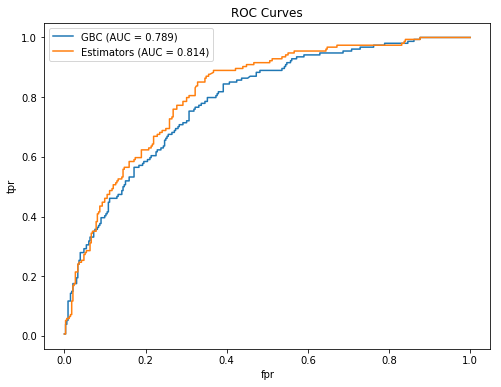

In [9]:
#compare baseline and cv-model
gbc.compareModels()